# Лабораторная работа №1 по дицспилине «Машинное обучение»

## Работу выполнил студент группы **3374, Савенков Дмитрий**

# 1. Загрузка и первичный осмотр датасета

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('winequality-red.csv', delimiter=';')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер датасета: (1599, 12)

Первые 5 строк:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. ОПИСАНИЕ ДАТАСЕТА

## Описание датасета Red Wine Quality

**Предметная область:** Химический анализ и сенсорная оценка качества красных вин

**Источник данных:** UCI Machine Learning Repository\
**Характер данных:** Реальные данные

**Атрибуты:**
1. fixed acidity (числовой) - фиксированная кислотность (г/л винной кислоты)
2. volatile acidity (числовой) - летучая кислотность (г/л уксусной кислоты)
3. citric acid (числовой) - лимонная кислота (г/л)
4. residual sugar (числовой) - остаточный сахар (г/л)
5. chlorides (числовой) - хлориды (г/л хлористого натрия)
6. free sulfur dioxide (числовой) - свободный диоксид серы (мг/л)
7. total sulfur dioxide (числовой) - общий диоксид серы (мг/л)
8. density (числовой) - плотность (г/мл)
9. pH (числовой) - уровень pH
10. sulphates (числовой) - сульфаты (г/л сернокислого калия)
11. alcohol (числовой) - алкоголь (% об.)
12. quality (числовой) - качество (сенсорная оценка от 0 до 10)

**Задача анализа:** 
Исследование взаимосвязи между химическими характеристиками вин и их сенсорной оценкой качества. 
Поиск наиболее значимых факторов, влияющих на качество вина.

# 3. АНАЛИЗ АТРИБУТОВ

## Базовая статистика

In [125]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Информация о типах данных

In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


## Проверка пропущенных значений

In [127]:
missing_values = df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Функция для анализа каждого атрибута


Атрибут: fixed acidity
Среднее: 8.3196
Стандартное отклонение: 1.7411
Медиана: 7.9000
Минимум: 4.6000
Максимум: 15.9000
Количество выбросов (метод IQR): 49


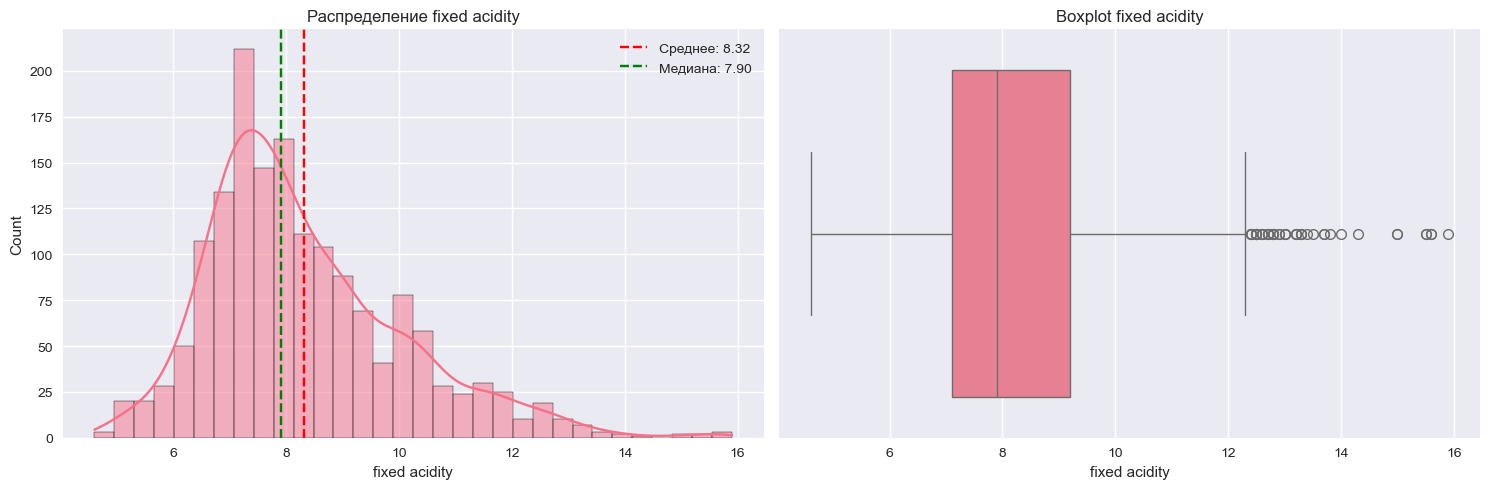


Атрибут: volatile acidity
Среднее: 0.5278
Стандартное отклонение: 0.1791
Медиана: 0.5200
Минимум: 0.1200
Максимум: 1.5800
Количество выбросов (метод IQR): 19


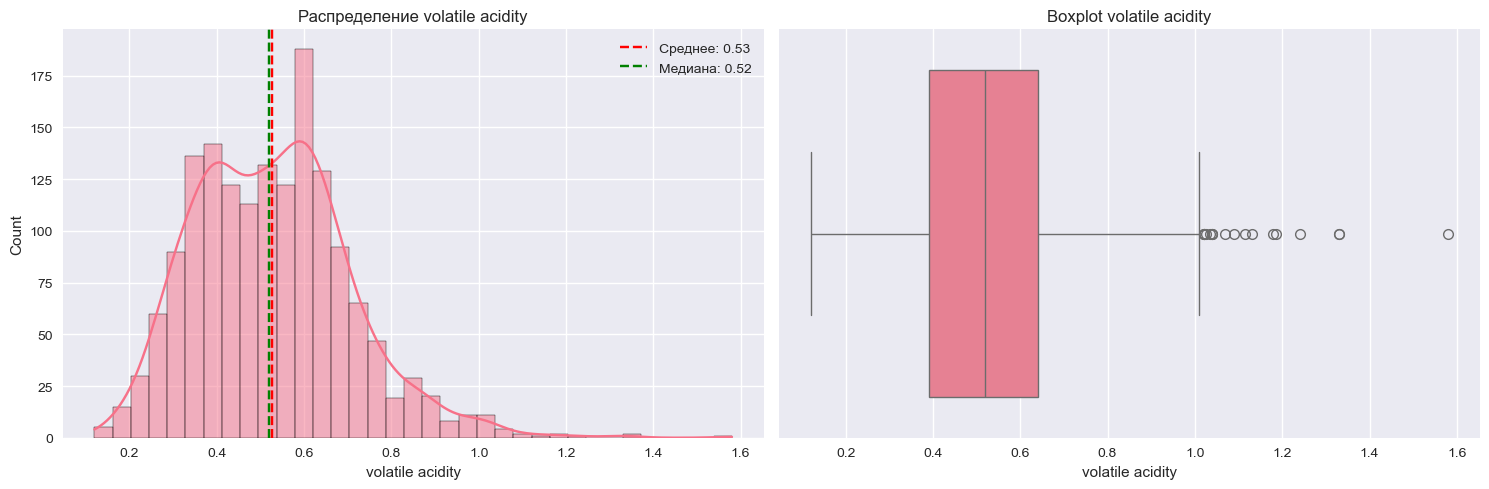


Атрибут: citric acid
Среднее: 0.2710
Стандартное отклонение: 0.1948
Медиана: 0.2600
Минимум: 0.0000
Максимум: 1.0000
Количество выбросов (метод IQR): 1


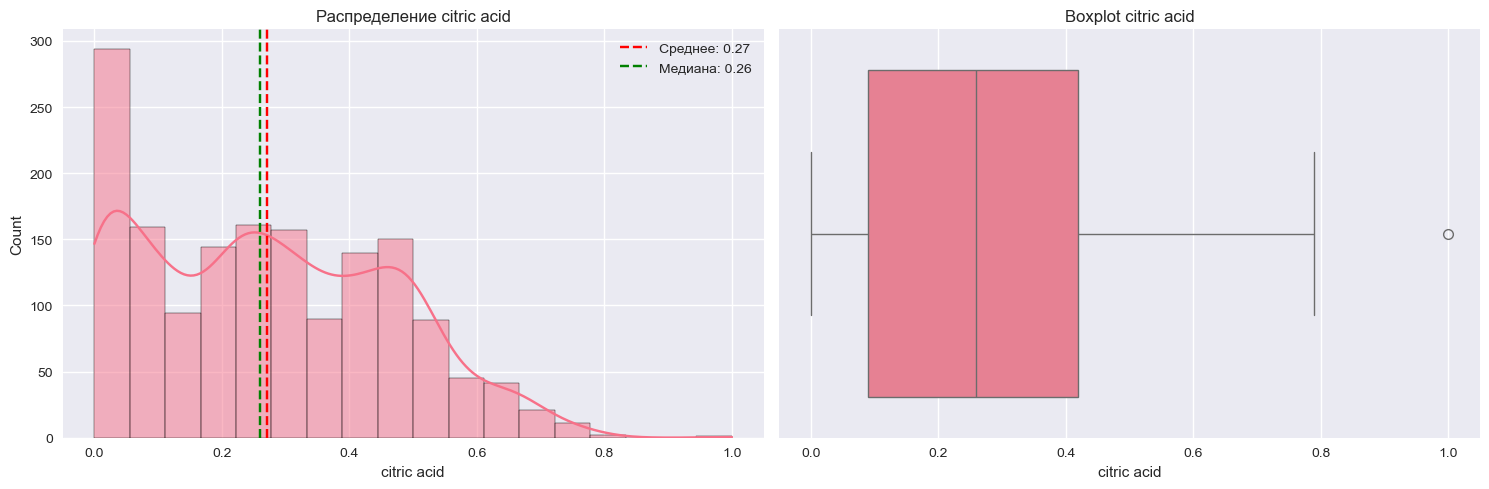


Атрибут: residual sugar
Среднее: 2.5388
Стандартное отклонение: 1.4099
Медиана: 2.2000
Минимум: 0.9000
Максимум: 15.5000
Количество выбросов (метод IQR): 155


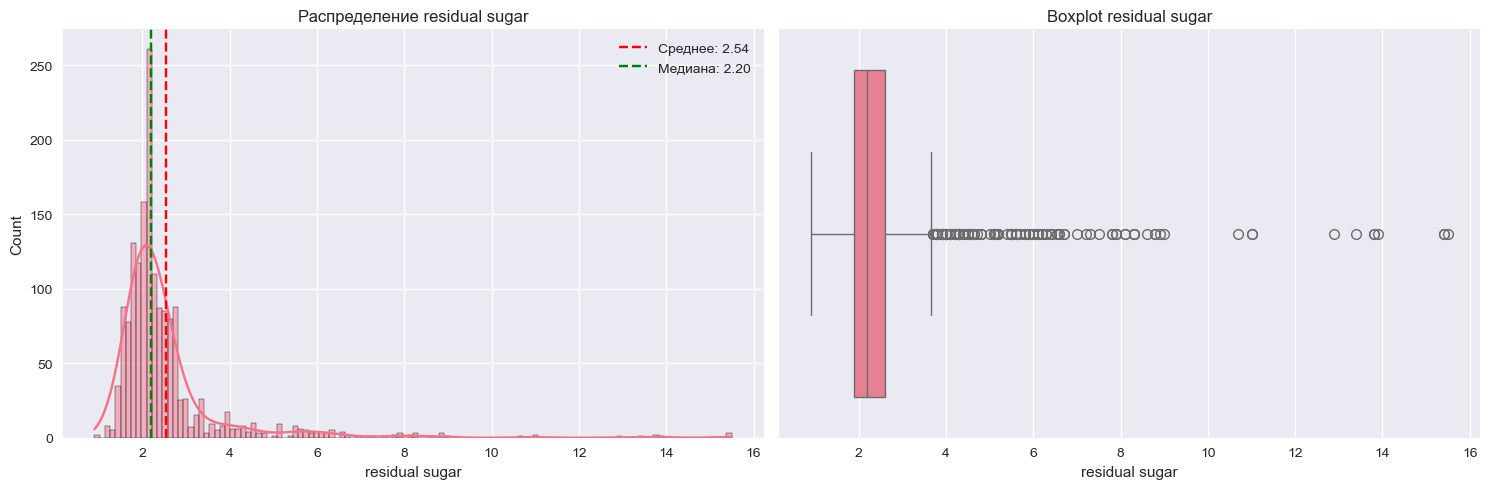


Атрибут: chlorides
Среднее: 0.0875
Стандартное отклонение: 0.0471
Медиана: 0.0790
Минимум: 0.0120
Максимум: 0.6110
Количество выбросов (метод IQR): 112


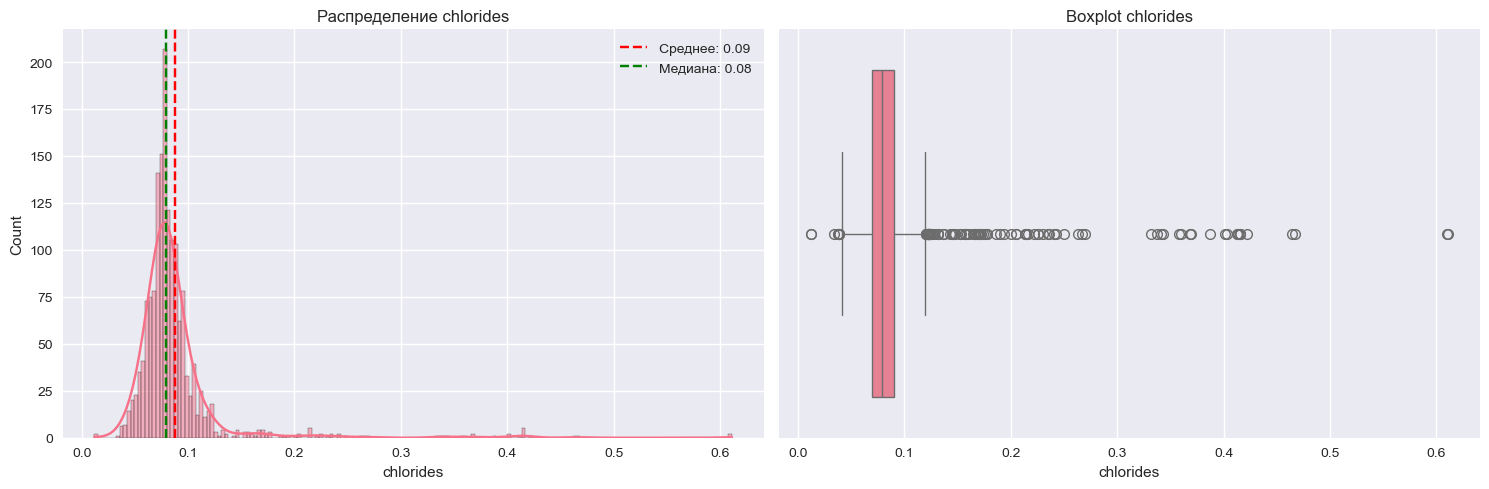


Атрибут: free sulfur dioxide
Среднее: 15.8749
Стандартное отклонение: 10.4602
Медиана: 14.0000
Минимум: 1.0000
Максимум: 72.0000
Количество выбросов (метод IQR): 30


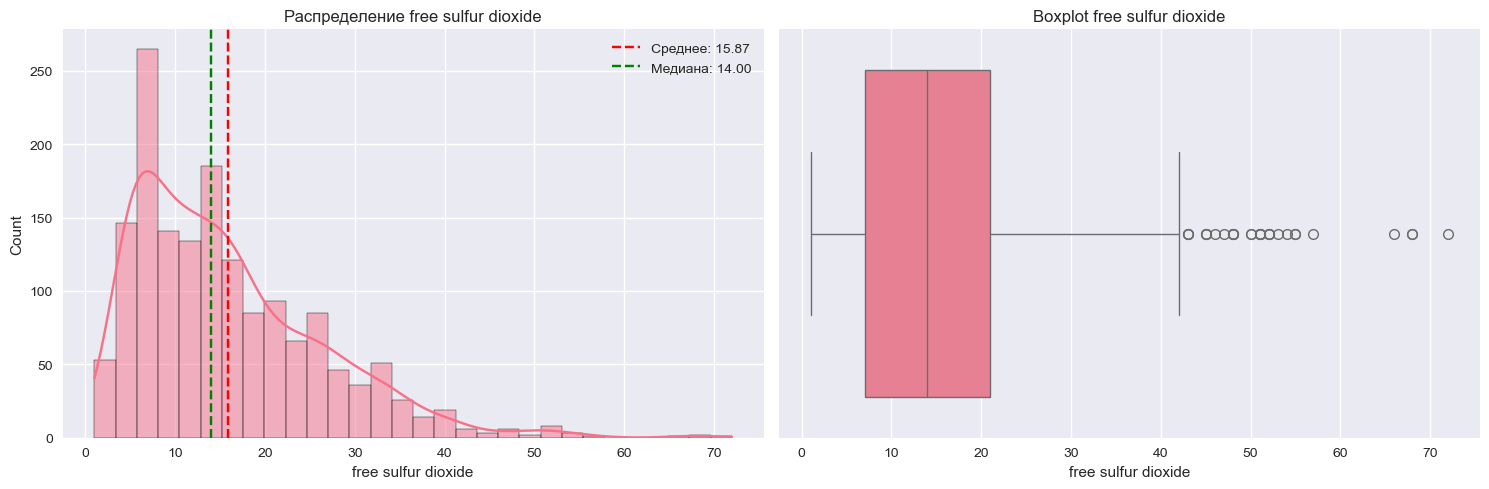


Атрибут: total sulfur dioxide
Среднее: 46.4678
Стандартное отклонение: 32.8953
Медиана: 38.0000
Минимум: 6.0000
Максимум: 289.0000
Количество выбросов (метод IQR): 55


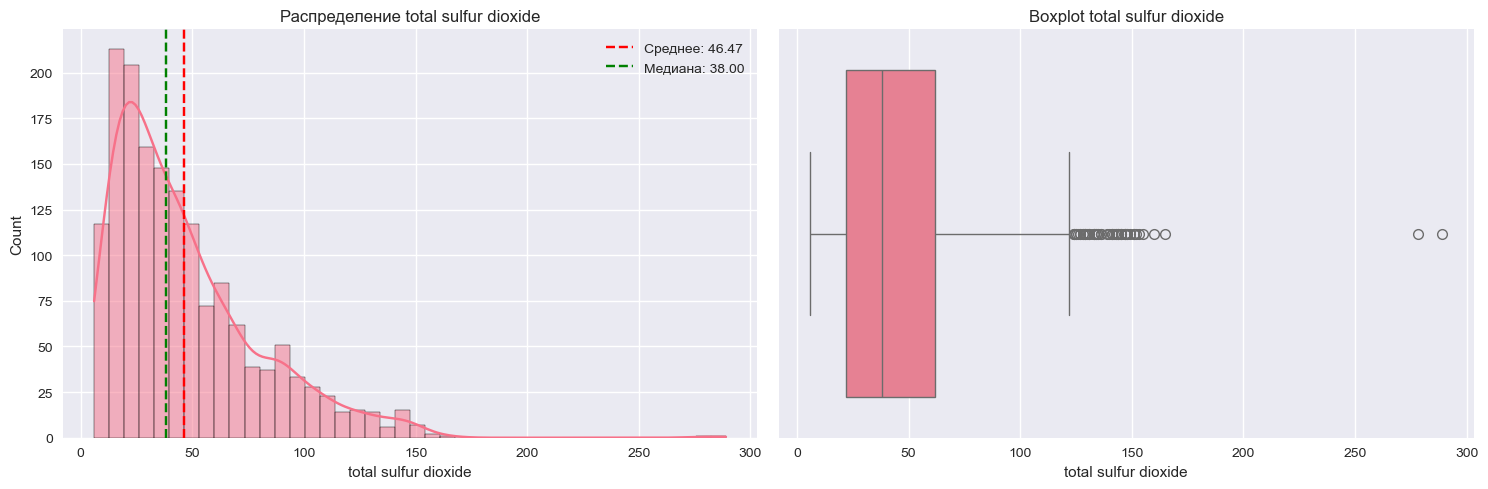


Атрибут: density
Среднее: 0.9967
Стандартное отклонение: 0.0019
Медиана: 0.9968
Минимум: 0.9901
Максимум: 1.0037
Количество выбросов (метод IQR): 45


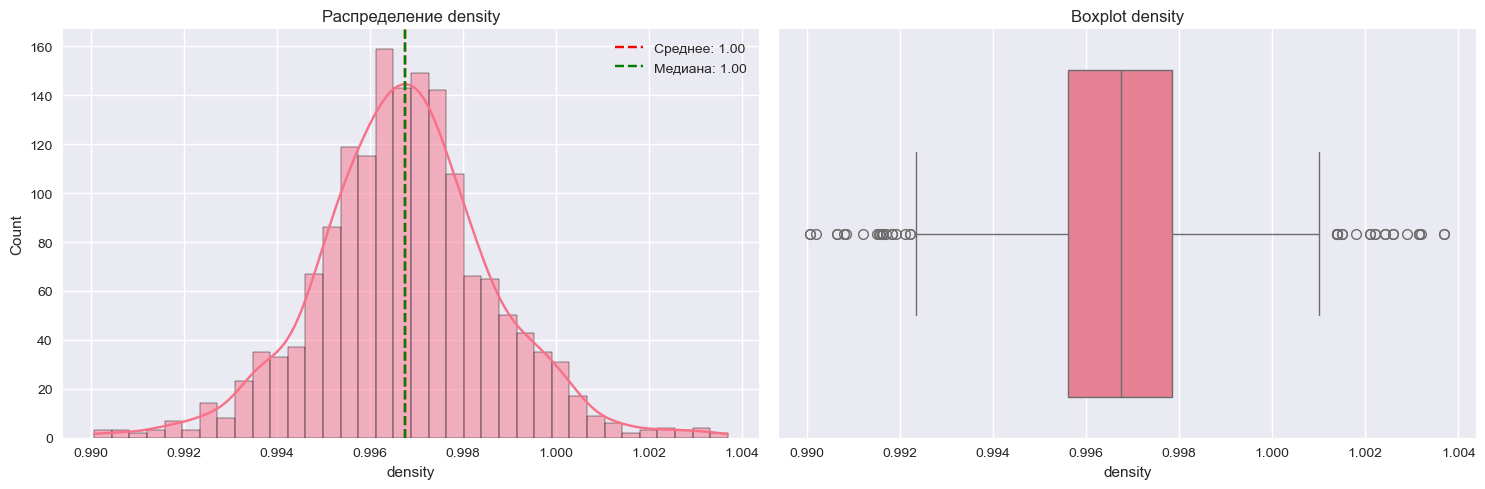


Атрибут: pH
Среднее: 3.3111
Стандартное отклонение: 0.1544
Медиана: 3.3100
Минимум: 2.7400
Максимум: 4.0100
Количество выбросов (метод IQR): 35


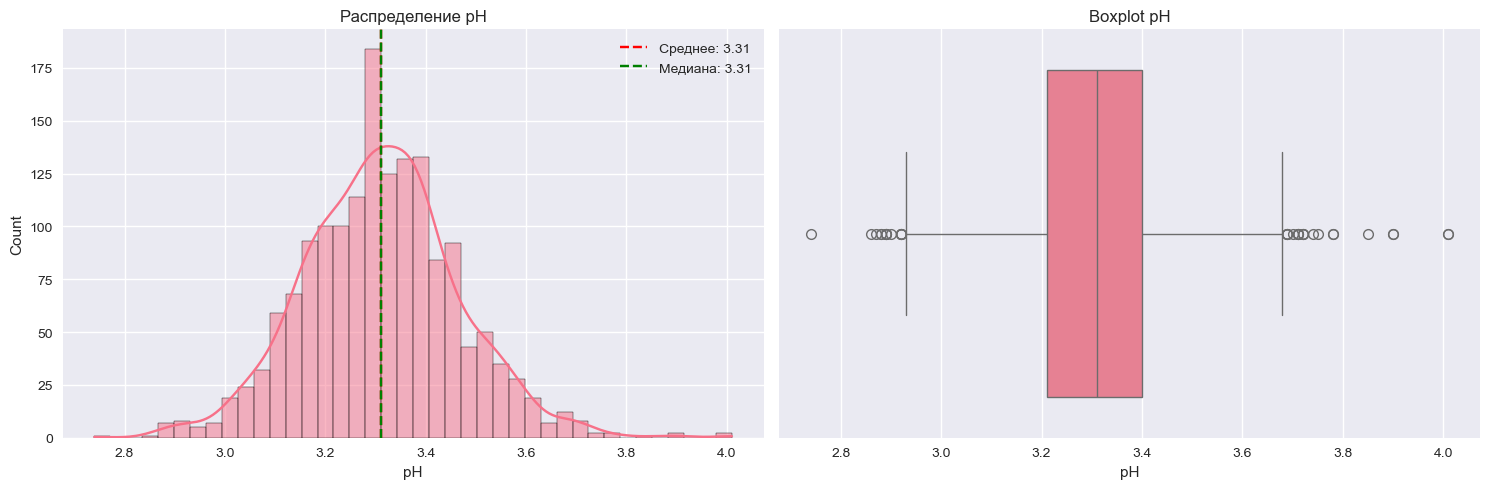


Атрибут: sulphates
Среднее: 0.6581
Стандартное отклонение: 0.1695
Медиана: 0.6200
Минимум: 0.3300
Максимум: 2.0000
Количество выбросов (метод IQR): 59


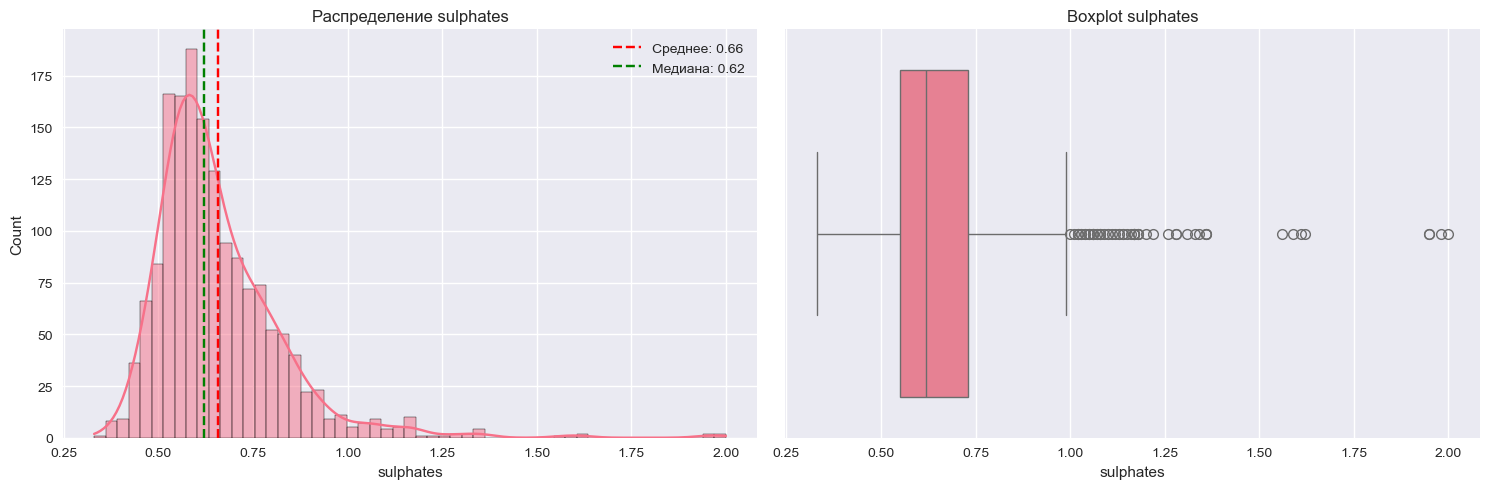


Атрибут: alcohol
Среднее: 10.4230
Стандартное отклонение: 1.0657
Медиана: 10.2000
Минимум: 8.4000
Максимум: 14.9000
Количество выбросов (метод IQR): 13


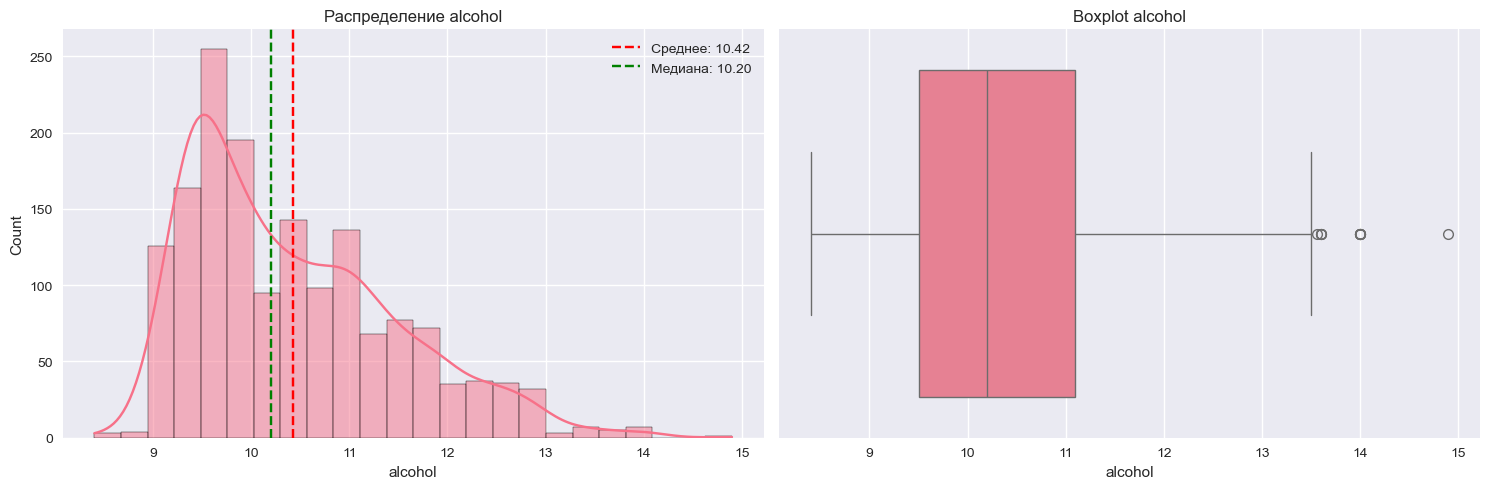


Атрибут: quality
Среднее: 5.6360
Стандартное отклонение: 0.8076
Медиана: 6.0000
Минимум: 3.0000
Максимум: 8.0000
Количество выбросов (метод IQR): 28


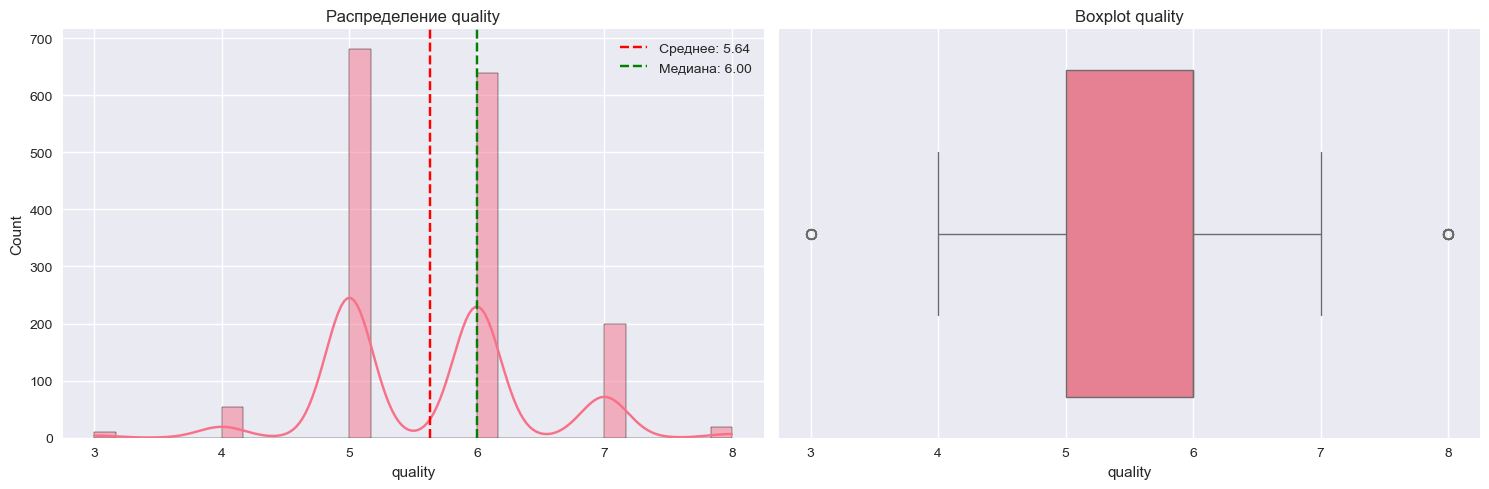

In [128]:
def analyze_feature(column_name, data):
    print(f"\nАтрибут: {column_name}")
    
    mean_val = data[column_name].mean()
    std_val = data[column_name].std()
    median_val = data[column_name].median()
    min_val = data[column_name].min()
    max_val = data[column_name].max()
    
    print(f"Среднее: {mean_val:.4f}")
    print(f"Стандартное отклонение: {std_val:.4f}")
    print(f"Медиана: {median_val:.4f}")
    print(f"Минимум: {min_val:.4f}")
    print(f"Максимум: {max_val:.4f}")
    
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    print(f"Количество выбросов (метод IQR): {len(outliers)}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.histplot(data[column_name], kde=True, ax=ax1)
    ax1.axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', label=f'Медиана: {median_val:.2f}')
    ax1.set_title(f'Распределение {column_name}')
    ax1.legend()
    
    sns.boxplot(x=data[column_name], ax=ax2)
    ax2.set_title(f'Boxplot {column_name}')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'mean': mean_val,
        'std': std_val,
        'outliers': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100
    }

stats_summary = {}
for column in df.columns:
    stats_summary[column] = analyze_feature(column, df)

## Сводная таблица статистик

In [129]:
stats_df = pd.DataFrame(stats_summary).T
print("СВОДНАЯ СТАТИСТИКА ПО ВСЕМ АТРИБУТАМ")
print(stats_df)

print("\nАНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
if df.isnull().sum().sum() == 0:
    print("Пропущенных значений не обнаружено!")
else:
    print("Обнаружены пропущенные значения:")
    print(df.isnull().sum())

СВОДНАЯ СТАТИСТИКА ПО ВСЕМ АТРИБУТАМ
                           mean        std  outliers  outlier_percentage
fixed acidity          8.319637   1.741096      49.0            3.064415
volatile acidity       0.527821   0.179060      19.0            1.188243
citric acid            0.270976   0.194801       1.0            0.062539
residual sugar         2.538806   1.409928     155.0            9.693558
chlorides              0.087467   0.047065     112.0            7.004378
free sulfur dioxide   15.874922  10.460157      30.0            1.876173
total sulfur dioxide  46.467792  32.895324      55.0            3.439650
density                0.996747   0.001887      45.0            2.814259
pH                     3.311113   0.154386      35.0            2.188868
sulphates              0.658149   0.169507      59.0            3.689806
alcohol               10.422983   1.065668      13.0            0.813008
quality                5.636023   0.807569      28.0            1.751094

АНАЛИЗ ПРОПУЩ

# 4. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

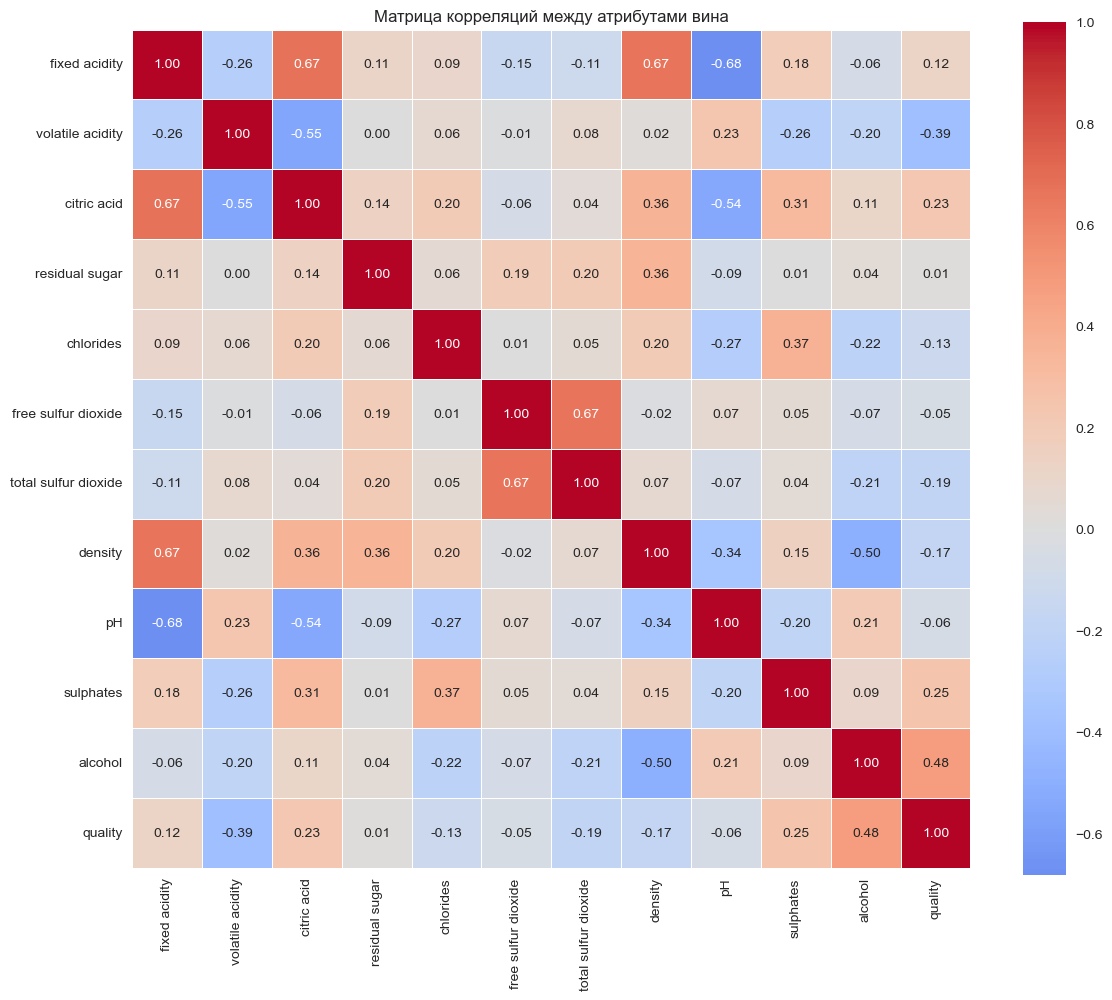

In [130]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Матрица корреляций между атрибутами вина')
plt.tight_layout()
plt.show()

## Анализ корреляций с качетсвом

### Корреляции с качеством (quality)

In [131]:
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### Визуализация корреляций с качеством

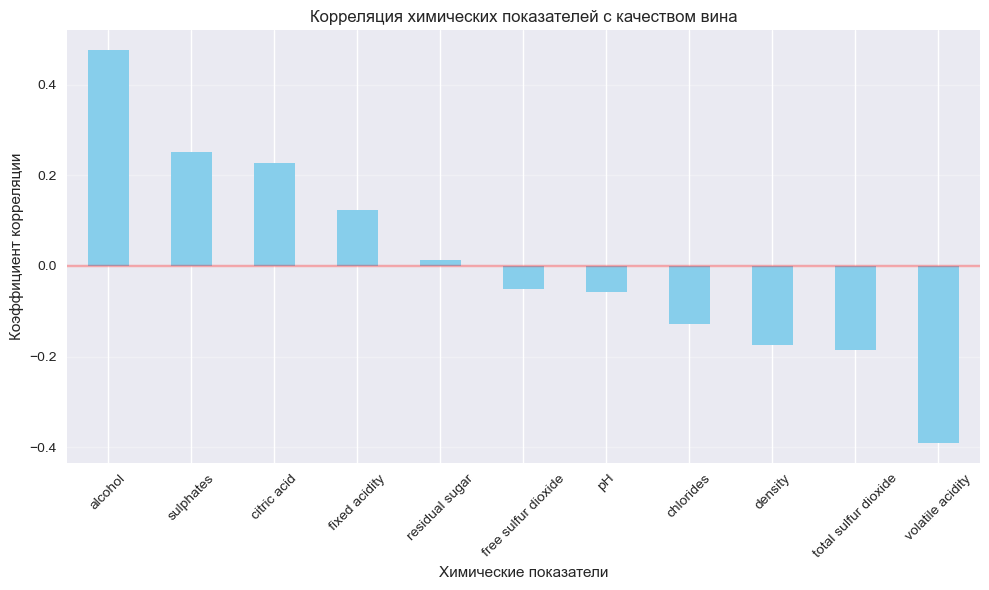

In [132]:
plt.figure(figsize=(10, 6))
quality_correlations.drop('quality').plot(kind='bar', color='skyblue')
plt.title('Корреляция химических показателей с качеством вина')
plt.xlabel('Химические показатели')
plt.ylabel('Коэффициент корреляции')
plt.axhline(y=0, color='red', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Анализ высоких корреляций

### Высококоррелированные пары атрибутов 

In [133]:
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

In [134]:
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

fixed acidity - pH: -0.683
fixed acidity - citric acid: 0.672
fixed acidity - density: 0.668
free sulfur dioxide - total sulfur dioxide: 0.668
volatile acidity - citric acid: -0.552
citric acid - pH: -0.542


### Матрица графиков рассеивания для высококоррелированных пар

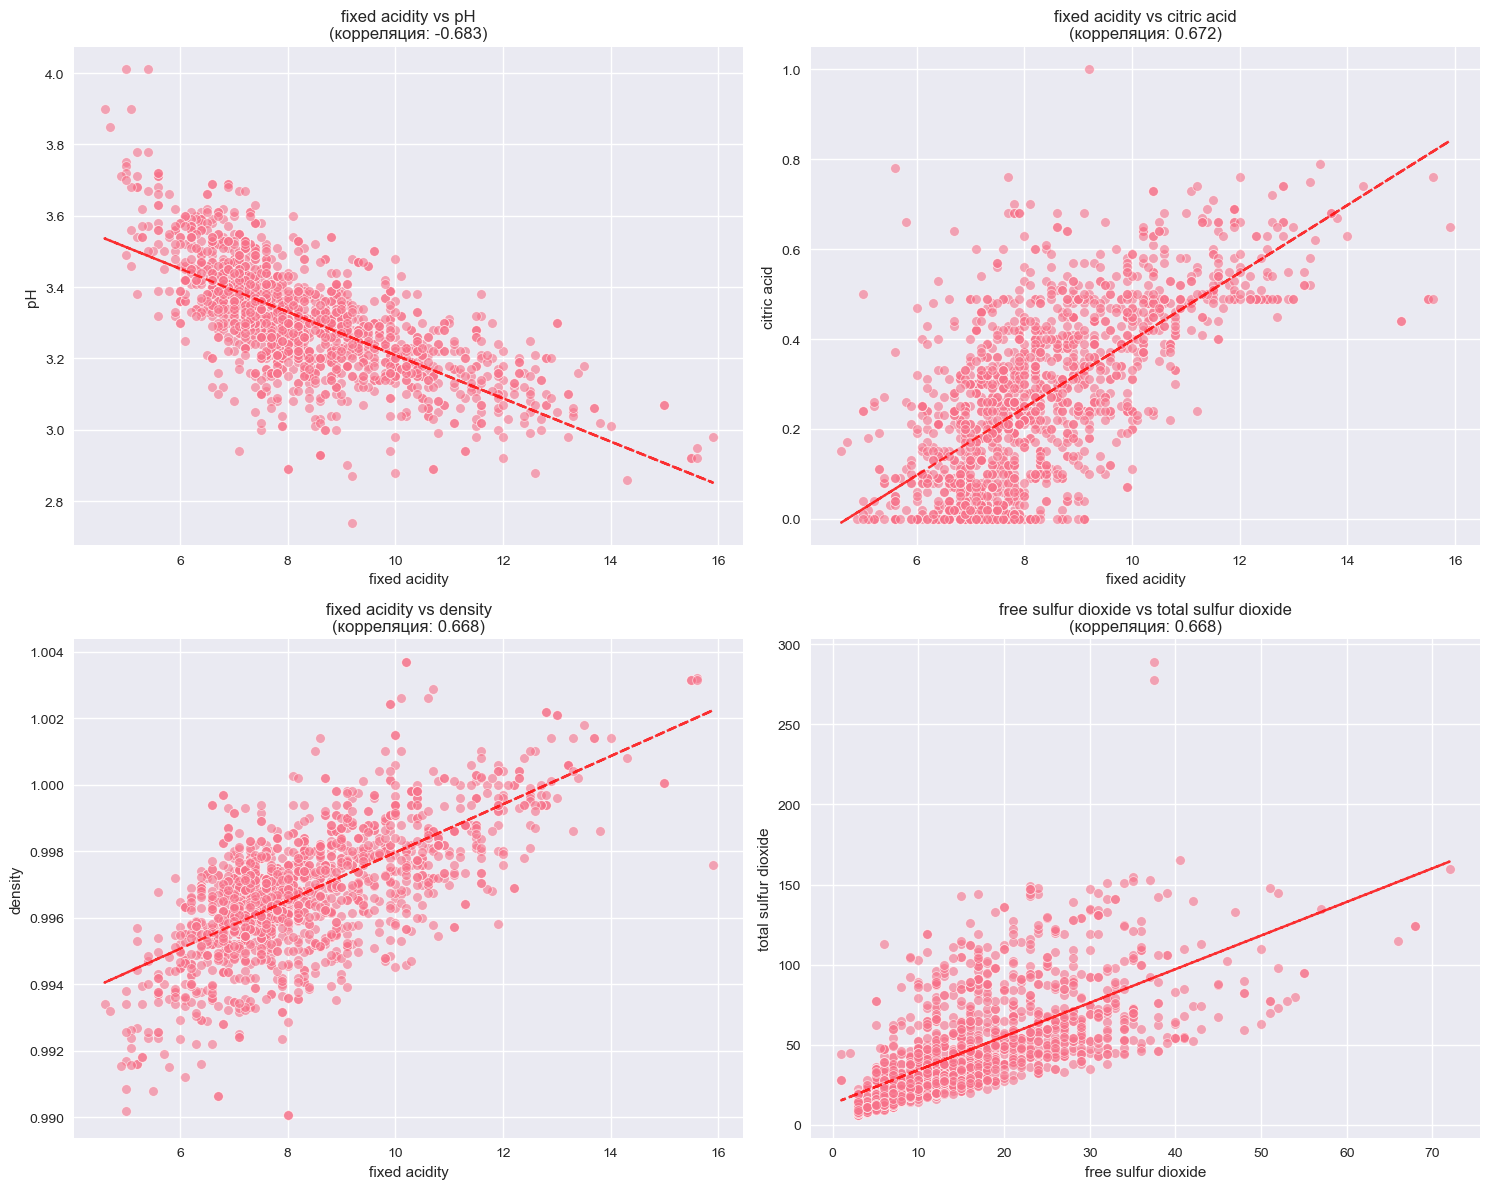

In [135]:
if high_corr_pairs:
    top_pairs = high_corr_pairs[:4]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, (col1, col2, corr) in enumerate(top_pairs):
        sns.scatterplot(data=df, x=col1, y=col2, ax=axes[idx], alpha=0.6)
        axes[idx].set_title(f'{col1} vs {col2}\n(корреляция: {corr:.3f})')
        z = np.polyfit(df[col1], df[col2], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[col1], p(df[col1]), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()

## Детальный анализ связи с качеством

### Графики рассеивания для атрибутов с наибольшей корреляцией с качеством

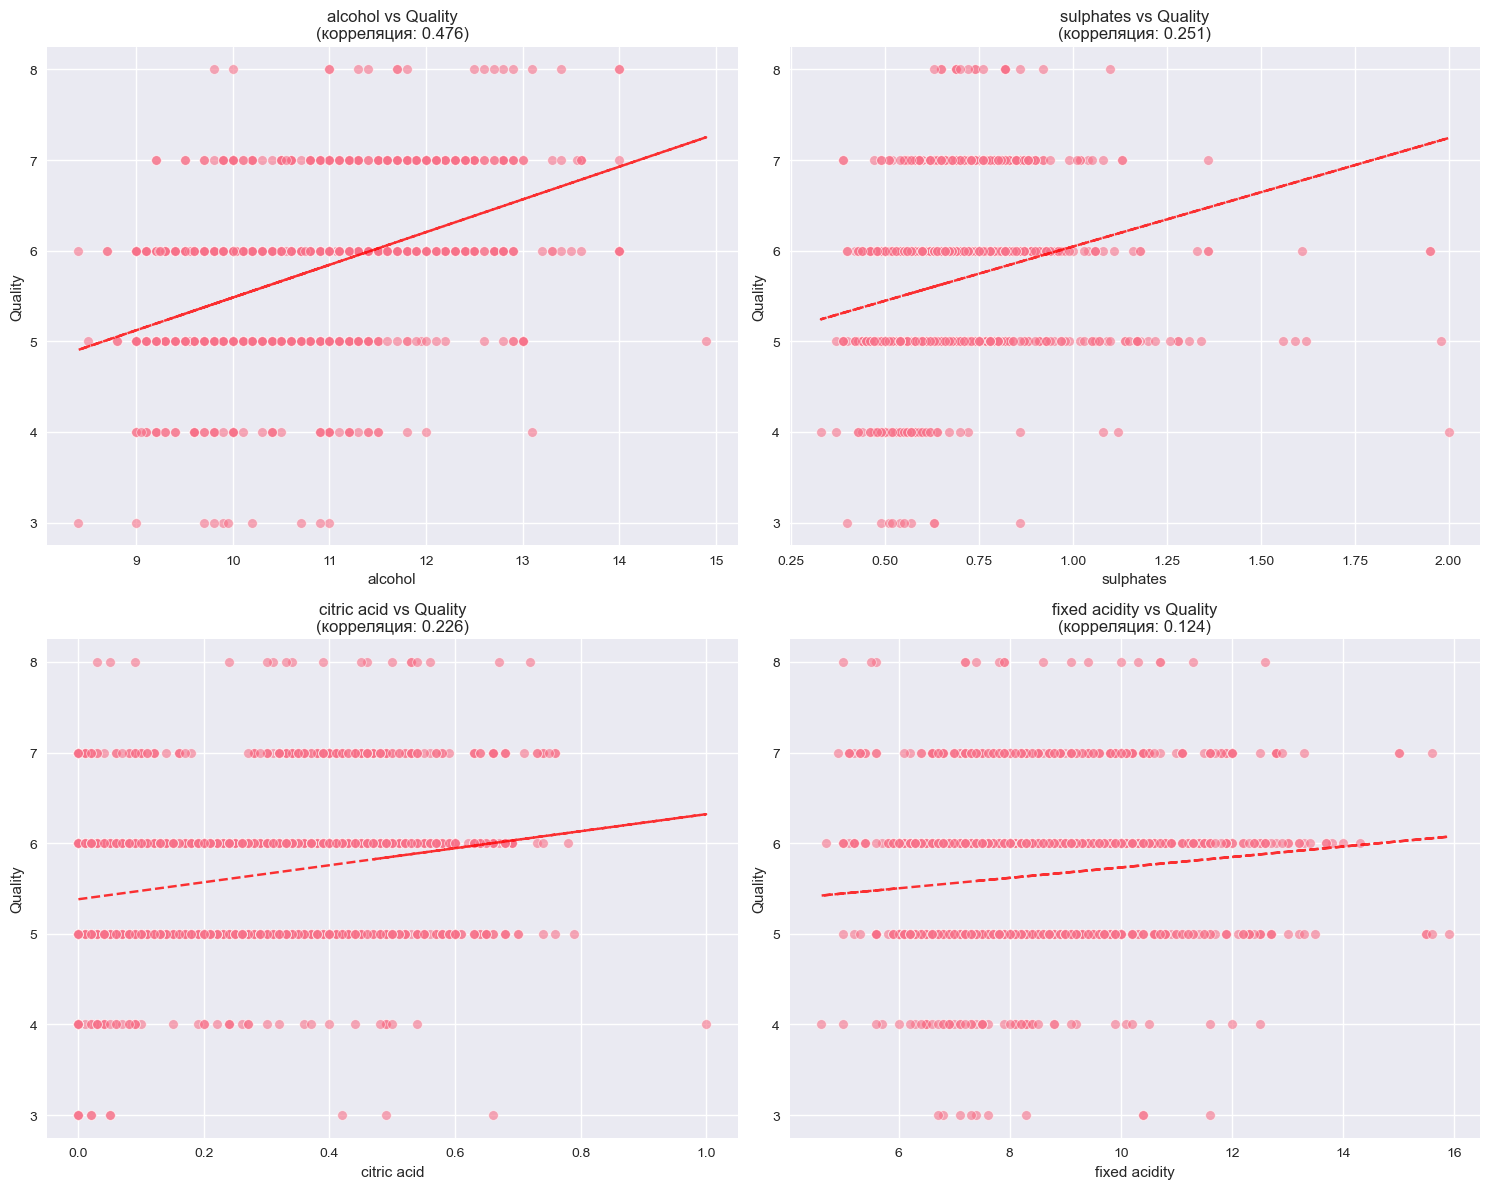

In [136]:
top_quality_corr = quality_correlations.drop('quality').head(4)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (feature, corr) in enumerate(top_quality_corr.items()):
    sns.scatterplot(data=df, x=feature, y='quality', ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'{feature} vs Quality\n(корреляция: {corr:.3f})')
    z = np.polyfit(df[feature], df['quality'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8)
    axes[idx].set_ylabel('Quality')
    axes[idx].set_xlabel(feature)

plt.tight_layout()
plt.show()

### Анализ атрибутов с низкой корреляцией

In [137]:
print("АТРИБУТЫ С НИЗКОЙ КОРРЕЛЯЦИЕЙ С КАЧЕСТВОМ")
low_quality_corr = quality_correlations[abs(quality_correlations) < 0.1]
print("Атрибуты с корреляцией < |0.1| с качеством:")
print(low_quality_corr)



АТРИБУТЫ С НИЗКОЙ КОРРЕЛЯЦИЕЙ С КАЧЕСТВОМ
Атрибуты с корреляцией < |0.1| с качеством:
residual sugar         0.013732
free sulfur dioxide   -0.050656
pH                    -0.057731
Name: quality, dtype: float64


### Анализ независимых атрибутов (низкая корреляция между собой)

In [138]:
print("\nНЕЗАВИСИМЫЕ АТРИБУТЫ")
independent_attrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < 0.1:
            independent_attrs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"Найдено {len(independent_attrs)} пар с низкой корреляцией (< |0.1|)")


НЕЗАВИСИМЫЕ АТРИБУТЫ
Найдено 26 пар с низкой корреляцией (< |0.1|)


## Распределение качества вин

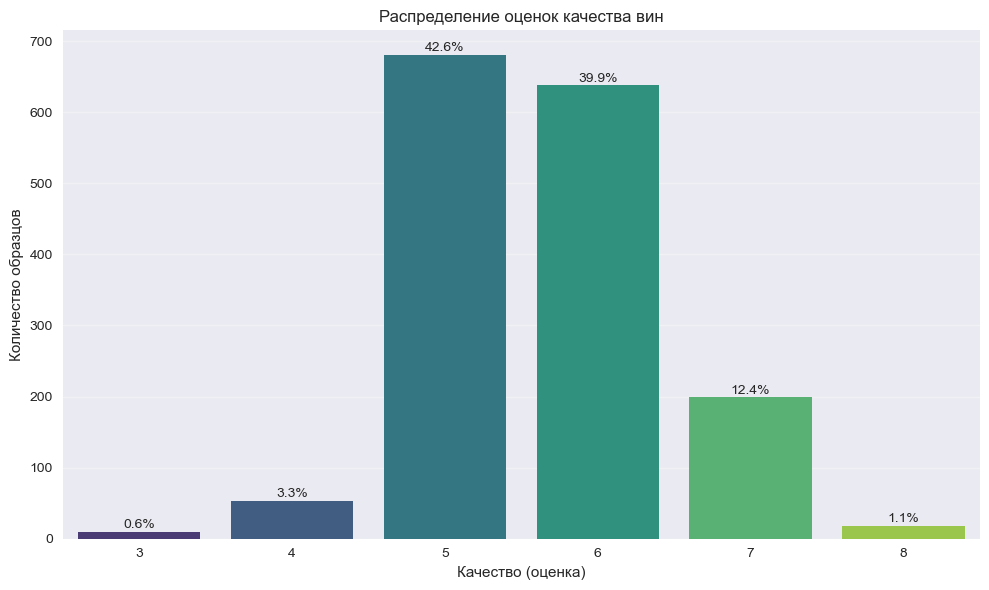

СТАТИСТИКА КАЧЕСТВА
Среднее качество: 5.64
Медиана качества: 6.00
Стандартное отклонение: 0.81


In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Распределение оценок качества вин')
plt.xlabel('Качество (оценка)')
plt.ylabel('Количество образцов')
plt.grid(axis='y', alpha=0.3)

total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    plt.gca().annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.show()

print("СТАТИСТИКА КАЧЕСТВА")
print(f"Среднее качество: {df['quality'].mean():.2f}")
print(f"Медиана качества: {df['quality'].median():.2f}")
print(f"Стандартное отклонение: {df['quality'].std():.2f}")

# 5. ФИНАЛЬНЫЕ ВЫВОДЫ И ЗАКЛЮЧЕНИЕ

## ВЫВОДЫ И РЕЗУЛЬТАТЫ АНАЛИЗА

### 1. КАЧЕСТВО ДАННЫХ:
- Пропущенные значения: отсутствуют
- Все атрибуты числовые, типы данных корректны
- Выбросы присутствуют в большинстве атрибутов, но их количество не критично

### 2. КЛЮЧЕВЫЕ ЗАВИСИМОСТИ КАЧЕСТВА ВИНА:

**СИЛЬНАЯ ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ с качеством:**
- Alcohol (0.48) - содержание алкоголя
- Sulphates (0.25) - сульфаты

**СИЛЬНАЯ ОТРИЦАТЕЛЬНАЯ КОРРЕЛЯЦИЯ с качеством:**
- Volatile acidity (-0.39) - летучая кислотность

**УМЕРЕННАЯ КОРРЕЛЯЦИЯ:**
- Citric acid (0.23) - лимонная кислота

### 3. ВЗАИМОСВЯЗИ МЕЖДУ ХИМИЧЕСКИМИ ПОКАЗАТЕЛЯМИ:

**ВЫСОКАЯ КОРРЕЛЯЦИЯ:**
- Fixed acidity - Density (0.67) - плотность зависит от кислотности
- Fixed acidity - Citric acid (0.67) - связь между разными типами кислот
- Total SO2 - Free SO2 (0.67) - логичная связь между формами диоксида серы
- Density - Fixed acidity (0.67) - взаимосвязь подтверждается

### 4. ПРАКТИЧЕСКИЕ ВЫВОДЫ ДЛЯ ВИНОДЕЛИЯ:

1. **Ключевые факторы качества**: содержание алкоголя и уровень летучей кислотности
2. **Второстепенные факторы**: сульфаты и лимонная кислота
3. **Незначимые факторы**: остаточный сахар, хлориды практически не влияют на оценку